In [4]:
import pickle
import numpy as np
from scipy import stats
from scipy import special
from scipy import integrate
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from common import print_metric_names

# Discrete Numerical vs. Continuous Numerical

In [5]:
result_df = pd.read_csv("../results/result-tables/discrete-numerical-vs-continuous-numerical.csv", index_col=False)
col_names = {
    "real_discrete": "Discrete is real",
    "real_continuous": "Continuous is real",
}

result_df.real_type = result_df.real_type.map(col_names)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,real_type,scale
0,I-Prec,0,discrete-numerical-vs-continuous-numerical,0,0.014000,Discrete is real,1.000000
1,I-Rec,0,discrete-numerical-vs-continuous-numerical,0,0.949000,Discrete is real,1.000000
2,Density,0,discrete-numerical-vs-continuous-numerical,0,0.035000,Discrete is real,1.000000
3,Coverage,0,discrete-numerical-vs-continuous-numerical,0,0.010000,Discrete is real,1.000000
4,I-Prec,0,discrete-numerical-vs-continuous-numerical,0,0.004000,Discrete is real,1.438450
...,...,...,...,...,...,...,...
4795,P-Rec,2,discrete-numerical-vs-continuous-numerical,9,0.935140,Continuous is real,483.293024
4796,P-Prec,2,discrete-numerical-vs-continuous-numerical,9,0.926171,Continuous is real,695.192796
4797,P-Rec,2,discrete-numerical-vs-continuous-numerical,9,0.918757,Continuous is real,695.192796
4798,P-Prec,2,discrete-numerical-vs-continuous-numerical,9,0.943040,Continuous is real,1000.000000


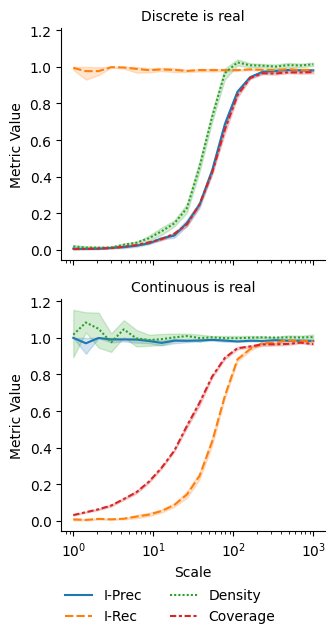

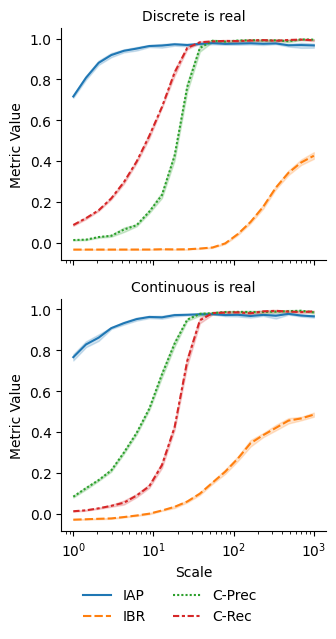

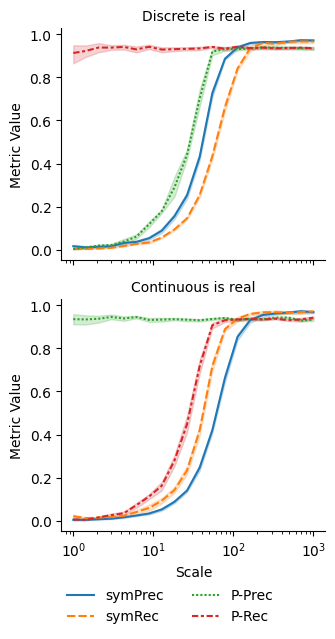

In [13]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    g = sns.FacetGrid(subset_df, row="real_type", height=3, aspect=1)
    g.map_dataframe(sns.lineplot, x="scale", y="value", hue="Metric", style="Metric")
    g.set_titles("{row_name}")
    g.set_xlabels("Scale")
    g.set(xscale="log")
    g.set_ylabels("Metric Value")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.03), ncol=2)
    g.figure.set_size_inches(3.5, 6)
    plt.tight_layout()
    plt.savefig("../figures/discrete/discrete_numerical_vs_continuous_numerical{}.pdf".format(i), bbox_inches="tight")
    plt.show()